In [2]:
import pandas as pd

In [3]:
autos=pd.read_csv('/content/FuelConsumptionCo2.csv')


In [4]:
autos

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
autosS=autos[["ENGINESIZE",	"CYLINDERS",	"FUELCONSUMPTION_CITY",	"FUELCONSUMPTION_HWY",	"FUELCONSUMPTION_COMB",	"FUELCONSUMPTION_COMB_MPG",	"CO2EMISSIONS"]]

In [9]:
X=autosS[["ENGINESIZE",	"CYLINDERS",	"FUELCONSUMPTION_CITY",	"FUELCONSUMPTION_HWY",	"FUELCONSUMPTION_COMB",	"FUELCONSUMPTION_COMB_MPG"]]
Y=autosS[["CO2EMISSIONS"]]

In [10]:
Y.shape

(1067, 1)

In [11]:
X.shape

(1067, 6)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(autosS)
print(scaler.mean_)

[  3.34629803   5.79475164  13.29653233   9.47460169  11.58088097
  26.44142455 256.22867854]


In [19]:
autosScaler=scaler.transform(autosS)

In [20]:
autos_df=pd.DataFrame(autosScaler,columns=autosS.columns)

In [22]:
xT=autos_df.drop("CO2EMISSIONS",axis=1)
yT=autos_df["CO2EMISSIONS"]

In [21]:
autos_df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,-0.951292,-0.998969,-0.828558,-0.993341,-0.884304,0.878553,-0.950840
1,-0.668653,-0.998969,-0.511433,-0.635329,-0.568571,0.342734,-0.556161
2,-1.304591,-0.998969,-1.779932,-1.315552,-1.630581,2.887876,-1.898070
3,0.108606,0.114242,-0.145519,-0.134112,-0.138027,-0.193086,-0.019397
4,0.108606,0.114242,-0.291885,-0.277317,-0.281542,0.074824,-0.193056
...,...,...,...,...,...,...,...
1062,-0.244694,0.114242,0.025240,0.116497,0.062894,-0.327041,0.233197
1063,-0.103374,0.114242,-0.023548,0.009093,-0.023215,-0.193086,0.122687
1064,-0.244694,0.114242,0.025240,0.116497,0.062894,-0.327041,0.233197
1065,-0.103374,0.114242,-0.096731,-0.062510,-0.080621,-0.193086,0.059538


In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(xT,yT,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import Lasso

In [63]:
lassoA=Lasso(alpha=0.2)

In [64]:
lassoA.fit(X_train,Y_train)

Lasso(alpha=0.2)

In [65]:
lassoA.coef_

array([ 0.18017453,  0.10493751,  0.        ,  0.        ,  0.13237548,
       -0.35433161])

In [66]:
coeficientes=pd.Series(lassoA.coef_,index=xT.columns)
print("Coeficientes:",coeficientes)


Coeficientes: ENGINESIZE                  0.180175
CYLINDERS                   0.104938
FUELCONSUMPTION_CITY        0.000000
FUELCONSUMPTION_HWY         0.000000
FUELCONSUMPTION_COMB        0.132375
FUELCONSUMPTION_COMB_MPG   -0.354332
dtype: float64


In [67]:
import matplotlib.pyplot as plt

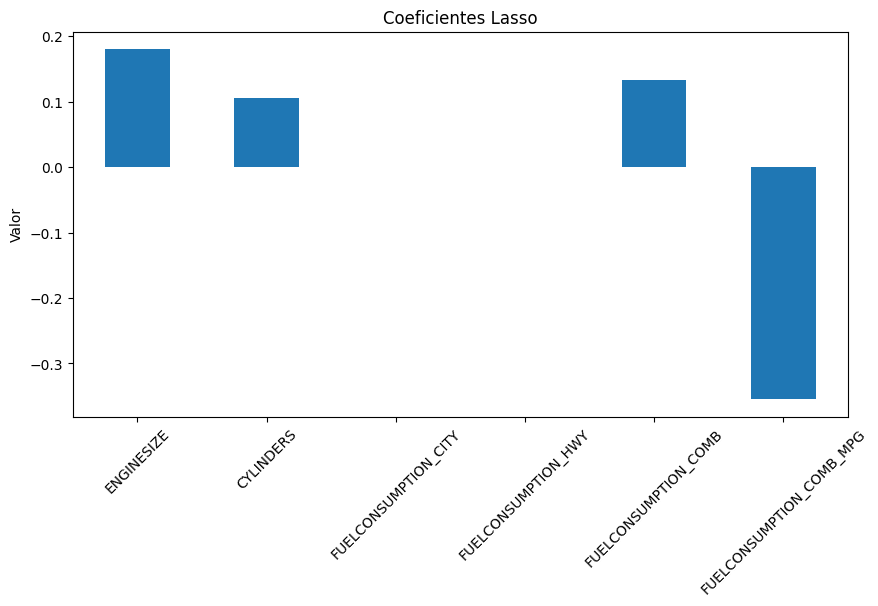

In [68]:
plt.figure(figsize=(10,5))
coeficientes.plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Coeficientes Lasso")
plt.ylabel("Valor")
plt.show()